In [3]:
id1 = "313593980"
id2 = "312244197"

name_student_1 = "binyamin, yagoda"
name_student_2 = "yonatan, yamin"

import pandas as pd
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv'
youtube_df = pd.read_csv(url)

In [6]:
youtube_df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [7]:
youtube_df['publish_time'] = pd.to_datetime(youtube_df['publish_time'])

## q1 - display the data "title, views, published_time" from the most viewed video

In [8]:
x = youtube_df.views.max()
youtube_df[youtube_df['views']==x][['publish_time','title','views']]

publish_time  \
6181 2017-12-06 17:58:51+00:00   

                                                  title      views  
6181  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  149376127

## q2  -  display the data "channel _title", "views" from the three most viewed channels

In [9]:
youtube_df.groupby('channel_title')[['channel_title','views']].sum().nlargest(3,'views')

views
channel_title                  
YouTube Spotlight     783298628
Marvel Entertainment  679590872
LuisFonsiVEVO         534738794

## q3 - present the correlation by "spearman" between the number of "likes",  "dislikes", "views", and "comment count"

In [10]:
correlation_matrix = youtube_df[['comment_count','likes','dislikes','views']].corr(method='spearman') 
correlation_matrix

comment_count     likes  dislikes     views
comment_count       1.000000  0.881849  0.843331  0.840532
likes               0.881849  1.000000  0.801154  0.877789
dislikes            0.843331  0.801154  1.000000  0.866979
views               0.840532  0.877789  0.866979  1.000000

## q4 - creating a chart of "heatmap" from the data that showed in the last section

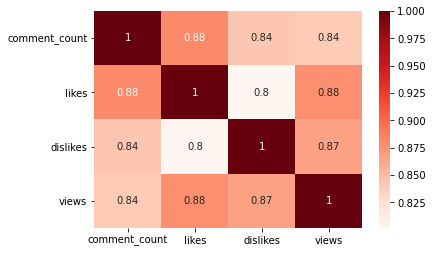

In [11]:
sns.heatmap(data=correlation_matrix,cmap='Reds', annot=True)


## q5 - creat a "scatterplot" that display the two strongest correlation from the data above

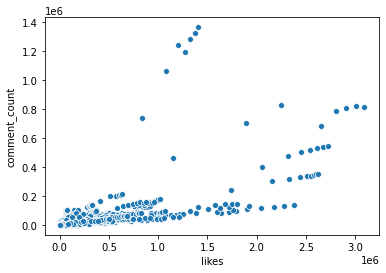

In [12]:
sort_corr = correlation_matrix.replace(1,0).unstack().sort_values(ascending = False)
hig_corr =pd.Series.keys(sort_corr)
sns.scatterplot(data=youtube_df, x=hig_corr[0][0], y=hig_corr[0][1])

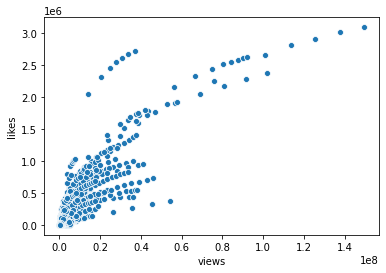

In [13]:
sns.scatterplot(data=youtube_df, x=hig_corr[2][0], y=hig_corr[2][1])

## q6 - displaying the number of views in each "category_id" for the years 2017-2018

In [14]:
youtube_df['year'] =  pd.DatetimeIndex(youtube_df.publish_time).year
youtube_df[(youtube_df['year']==2017)| (youtube_df['year']==2018)].pivot_table('views','category_id' ,aggfunc = sum)

views
category_id            
1            1009534450
2              86900867
10           5344552275
15            176875195
17            442903515
19             61874890
20            134531087
22            769675204
23           1327929119
24           4694934150
25            284149302
26            888860543
27            251472031
28            586057060
29               383367
43              1751446